In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
reference_data = '/feynman/home/dap/lcs/as274094/work/wf-psf/data/coherent_euclid_dataset/'
selected_id_SED = np.load(reference_data+'selected_id_SED.npy', allow_pickle=True)
for i in selected_id_SED:
    print(selected_id_SED[i])
    

6
8
4
4
0
2
4
0
6
0
10
6
4
8
1
10
4
4
4
6
6
3
4
8
0
6
6
2
2
4
6
8
8
10
3
0
4
2
10
4
4
6
6
1
6
0
8
6
2
0
0
3
8
4
2
6
0
0
1
0
6
4
4
4
4
10
3
0
4
0
8
4
4
4
8
4
0
4
4
0
8
0
1
2
1
8
4
10
4
8
10
8
8
1
8
6
10
0
8
4
8
4
8
10
4
8
3
8
6
10
1
6
8
1
10
4
4
4
1
8
6
4
4
6
10
0
10
8
4
6
4
4
8
8
4
4
0
2
6
0
8
8
4
4
8
10
3
6
1
4
1
0
4
10
2
2
4
4
6
3
4
6
0
6
8
8
6
0
10
6
4
6
4
4
8
4
6
3
4
8
6
0
8
1
0
10
4
3
6
2
4
3
2
10
1
2
3
6
6
3
1
4
0
10
4
3
8
4
6
1
6
0
2
8
6
4
8
0
10
4
1
8
6
6
0
4
0
1
8
4
6
6
2
3
3
1
4
4
6
3
4
6
10
4
4
4
6
8
6
8
6
0
2
10
0
8
0
0
6
1
8
1
3
0
0
8
0
2
6
4
6
6
8
8
4
4
1
6
0
0
4
4
6
6
6
8
6
6
3
1
3
3
4
2
8
8
4
4
6
8
6
2
6
4
0
6
1
8
8
6
6
8
4
2
3
0
0
0
8
4
2
6
4
6
4
4
6
10
3
10
6
4
10
4
0
4
8
0
4
8
4
4
4
8
8
6
8
4
0
3
6
3
8
2
6
8
0
1
4
1
8
3
4
4
3
8
6
2
4
0
3
0
1
4
0
1
0
8
10
3
6
6
8
0
4
3
6
0
8
1
10
6
0
0
6
6
0
0
0
2
10
0
4
6
8
0
4
4
0
8
4
4
4
6
4
4
10
8
8
8
8
2
8
1
6
10
1
3
6
8
8
6
10
4
8
2
6
8
0
3
3
0
2
4
8
3
6
1
4
0
2
10
6
1
4
4
6
0
0
8
8
4
8
10
4
2
4
6
6
8
8
1
4
6
8
3
10
2
4
8
8
0
0


In [7]:
arr = np.array([1, 2, 3, 2, 1, 2, 3, 4, 5, 4, 4, 4])
unique_values, counts = np.unique(selected_id_SED, return_counts=True)

for val, count in zip(unique_values, counts):
    if count > 1:
        print(f"{val} repeated {count} times")

0 repeated 0.9966666666666667 times
1 repeated 0.9045833333333333 times
2 repeated 1.1483333333333334 times
3 repeated 1.04 times
4 repeated 1.12125 times
5 repeated 0.8233333333333334 times
6 repeated 1.0345833333333334 times
7 repeated 0.86125 times
8 repeated 0.9208333333333333 times
9 repeated 1.0183333333333333 times
10 repeated 0.95875 times
11 repeated 1.1320833333333333 times
12 repeated 1.04 times


In [4]:
output_folder = '/feynman/home/dap/lcs/as274094/work/output/psf_dataset_test/'
test_dataset = np.load(output_folder + 'test_Euclid_res_id_10_TestStars_id_001GT_100_bins.npy', allow_pickle=True)[()]
train_dataset = np.load(output_folder + 'train_Euclid_res_10_TrainStars_id_001GT_100_bins.npy', allow_pickle=True)[()]

In [17]:
np.sum(train_dataset['stars']-test_dataset['stars'])
np.sum(train_dataset['stars'])

10.0

In [18]:
print(test_dataset['stars'].shape)
print(train_dataset['stars'].shape)
index = 9

(10, 32, 32)
(10, 32, 32)


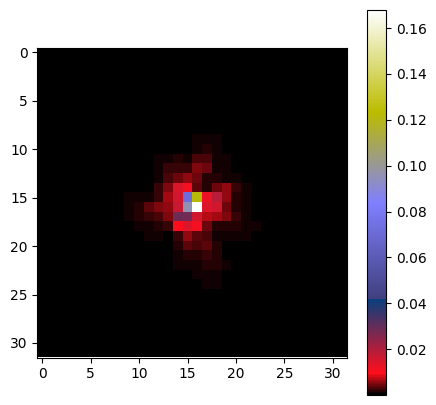

In [19]:
plt.figure(figsize=(5,5))
plt.imshow(train_dataset['stars'][index,:,:], cmap='gist_stern');plt.colorbar()
plt.show()

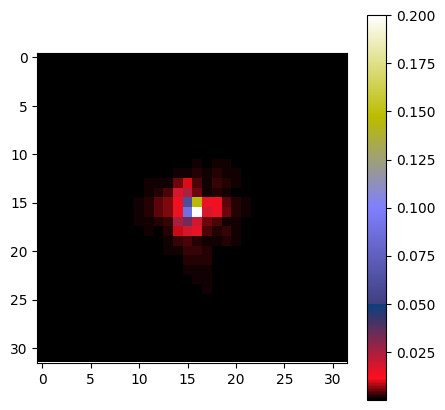

In [20]:
plt.figure(figsize=(5,5))
plt.imshow(test_dataset['stars'][index,:,:], cmap='gist_stern');plt.colorbar()
plt.show()